In [83]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from utils.resnet import resnet18
import torch
from utils import get_cifar10_loaders, eval_on_dataloader
from tqdm import tqdm
from utils.viz import plot_pairwise_subplots

seed = 7
results_path = f'results_reg/seed{seed}_0.05/results.pkl'

with open(results_path, 'rb') as f:
    results = pickle.load(f)
    index = range(5, (len(results)+1)* 5, 5)
    results_reg = pd.DataFrame(results, index = index)


results_path = f'results/seed{seed}/results.pkl'
with open(results_path, 'rb') as f:
    results = pickle.load(f)[:len(results_reg)]
    index = range(5, (len(results)+1)* 5, 5)
    results = pd.DataFrame(results, index = index)



# Comparison regularization effects on PL with respect to training accuracy

In [51]:
checkpoints_path = f'results/seed{seed}/checkpoints/'

loaders_half = get_cifar10_loaders(0.5, seed = 7)
train_loader = loaders_half['train_loader']

accuracies = []
for epoch in tqdm(index):
    model = resnet18()
    checkpoint_path = f'{checkpoints_path}warm_up_{epoch}.pt'
    model.load_state_dict(torch.load(checkpoint_path))
    model.to('cuda')
    accuracies.append(eval_on_dataloader(model, train_loader))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 23/23 [02:19<00:00,  6.05s/it]


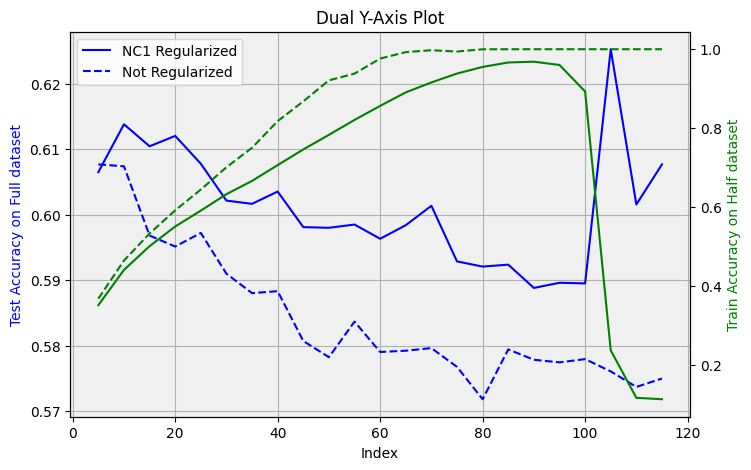

In [52]:
y1 = results_reg['test_acc']
y2 = results['test_acc']
y3 = results_reg['train_acc_half']
y4 = accuracies

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plotting the first set of data on the left y-axis
ax1.plot(index, y1, label='NC1 Regularized', color='blue')
ax1.plot(index, y2, label='Not Regularized',  color='blue', linestyle='--')

# Creating a secondary y-axis for the second set of data
ax2 = ax1.twinx()

# Plotting the second set of data on the right y-axis
ax2.plot(index, y3, label='train_acc_reg', color='green')
ax2.plot(index, y4, label='train_acc',color='green', linestyle='--')

# Adding labels and title to the plot
ax1.set_xlabel('Index')
ax1.set_ylabel('Test Accuracy on Full dataset', color='blue')
ax2.set_ylabel('Train Accuracy on Half dataset', color='green')

ax1.set_facecolor('#f0f0f0')
plt.title('Dual Y-Axis Plot')


ax1.grid()
# Displaying legends
ax1.legend(loc='upper left')
#ax2.legend(loc='lower left')

# Show the plot
plt.show()


# Comparison regularization effects on PL with respect to test accuracies

In [66]:
checkpoints_path = f'results/seed{seed}/checkpoints/'
checkpoints_path_reg = f'results_reg/seed{seed}_0.05/checkpoints/'

loaders_half = get_cifar10_loaders(0.5, seed = 7)
test_loader = loaders_half['test_loader']

accuracies = []
accuracies_reg = []
for epoch in tqdm(index):
    model = resnet18()
    checkpoint_path = f'{checkpoints_path}warm_up_{epoch}.pt'
    model.load_state_dict(torch.load(checkpoint_path))
    model.to('cuda')
    accuracies.append(eval_on_dataloader(model, test_loader))
    # for regularized model
    checkpoint_path_reg = f'{checkpoints_path_reg}warm_up_{epoch}.pt'
    model = resnet18()
    model.load_state_dict(torch.load(checkpoint_path_reg))
    model.to('cuda')
    accuracies_reg.append(eval_on_dataloader(model, test_loader))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 23/23 [01:58<00:00,  5.15s/it]


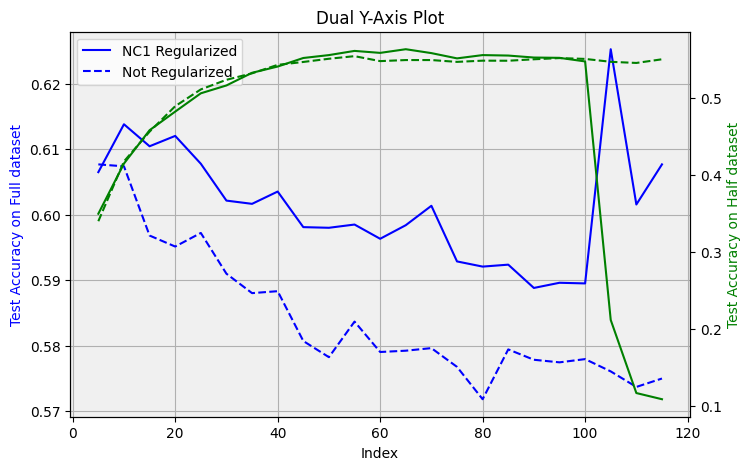

In [87]:
y1 = results_reg['test_acc']
y2 = results['test_acc']
y3 = accuracies_reg
y4 = accuracies

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plotting the first set of data on the left y-axis
ax1.plot(index, y1, label='NC1 Regularized', color='blue')
ax1.plot(index, y2, label='Not Regularized',  color='blue', linestyle='--')
# ax1.plot(index, results['test_acc_SP'], label='Shrink and Perturb', color='blue', linestyle='-.')

# Creating a secondary y-axis for the second set of data
ax2 = ax1.twinx()

# Plotting the second set of data on the right y-axis
ax2.plot(index, y3, label='train_acc_reg', color='green')
ax2.plot(index, y4, label='train_acc',color='green', linestyle='--')

# Adding labels and title to the plot
ax1.set_xlabel('Index')
ax1.set_ylabel('Test Accuracy on Full dataset', color='blue')
ax2.set_ylabel('Test Accuracy on Half dataset', color='green')

ax1.set_facecolor('#f0f0f0')
plt.title('Dual Y-Axis Plot')


ax1.grid()
# Displaying legends
ax1.legend(loc='upper left')
#ax2.legend(loc='lower left')

# Show the plot
plt.show()


# Gains on first task and second task thanks to regularization

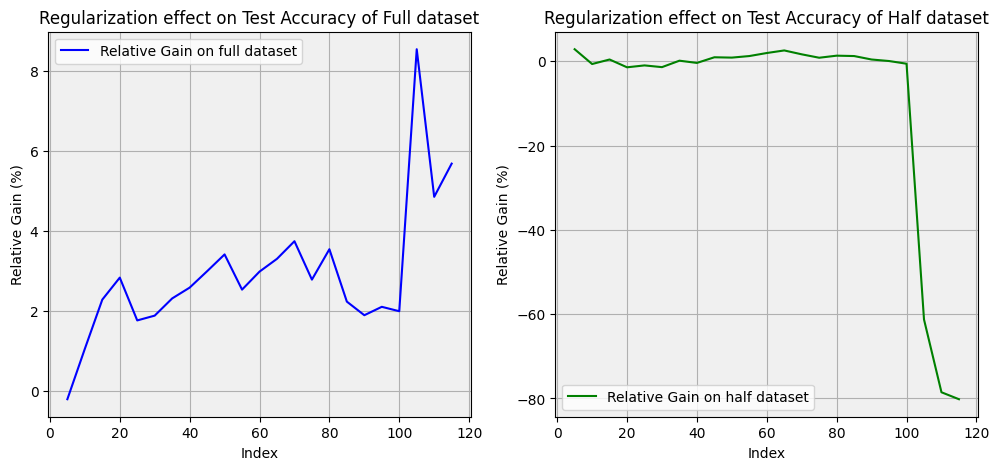

In [73]:
n = len(results_reg)

ratio_full = [round((results_reg['test_acc'][i]-results['test_acc'][i])/results['test_acc'][i]*100,2) for i in index]
ratio_half = [round((accuracies_reg[i]-accuracies[i])/accuracies[i]*100,2 )for i in range(n)]

# Plot
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# left plot
axes[0].plot(index, ratio_full, label='Relative Gain on full dataset', color='blue')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Relative Gain (%)')
axes[0].set_title('Regularization effect on Test Accuracy of Full dataset')
axes[0].grid()
axes[0].set_facecolor('#f0f0f0')
axes[0].legend(loc='upper left')

# right plot
axes[1].plot(index, ratio_half, label='Relative Gain on half dataset', color='green')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Relative Gain (%)')
axes[1].set_title('Regularization effect on Test Accuracy of Half dataset')
axes[1].grid()
axes[1].set_facecolor('#f0f0f0')
axes[1].legend(loc='lower left')


Correlation between test_acc and NC1: 0.91
Correlation between test_acc_sp and NC1_sp: 0.87


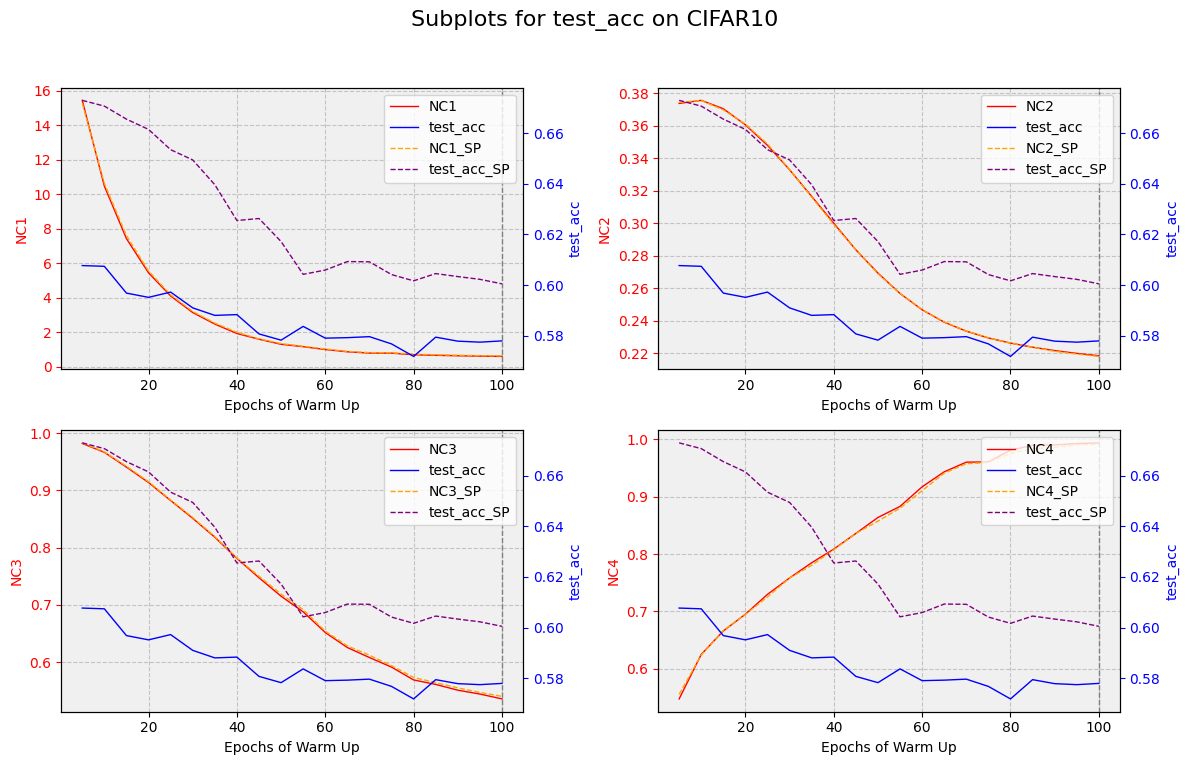

In [81]:
# correlations between PL and NC1 looking at the first 100 epochs
# Here maybe I shold plot only NC1 and use two different plots to appreciate correlation


seed = 7
results_path = f'results/seed{seed}/results.pkl'
with open(results_path, 'rb') as f:
    results = pickle.load(f)[:20]
    index = range(5, (len(results)+1)* 5, 5)
    results = pd.DataFrame(results, index = index)
metrics1 = ['NC1', 'NC2', 'NC3', 'NC4']


corr = results['test_acc'].corr(results['NC1'])
corr_sp = results['test_acc_SP'].corr(results['NC1_SP'])

print (f'Correlation between test_acc and NC1: {round(corr,2)}')
print (f'Correlation between test_acc_sp and NC1_sp: {round(corr_sp,2)}')

plot_pairwise_subplots(results, metrics1, metric2 = 'test_acc' )

# regularization with L2 norm

# Just to run stuff

In [21]:
def plot_metrics_with_error_bars(metric_names, y_label, metric_labels):
    final_dfs = [pd.read_csv(f'results/seed{seed}/final_df.csv') for seed in range(7,12)]

    # plotting it
    fig, ax = plt.subplots(figsize=(8, 5))
    colors = plt.cm.get_cmap('plasma', len(metric_names))
    for i, metric_name in enumerate(metric_names):
        metric = final_dfs[0][metric_name]
        for df in final_dfs:
            metric = pd.concat([metric, df[metric_name]], axis = 1)
        metric_mean = metric.mean(axis = 1)
        metric_std = metric.std(axis = 1)
        ax.plot(metric_mean, label=metric_labels[i], color= colors(i))
        ax.fill_between(metric_mean.index, metric_mean - metric_std, metric_mean + metric_std, alpha=0.3, color=colors(i))
    ax.set_xlabel('Index')
    ax.set_ylabel(y_label)

    ax.set_facecolor('#f0f0f0')
    plt.title('Mean and Std of Test Accuracy on Full dataset')
    ax.grid()
    ax.legend(loc='upper left')
    plt.show()

C:\Users\gugli\AppData\Local\Temp\ipykernel_20332\2604591964.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', len(metric_names))


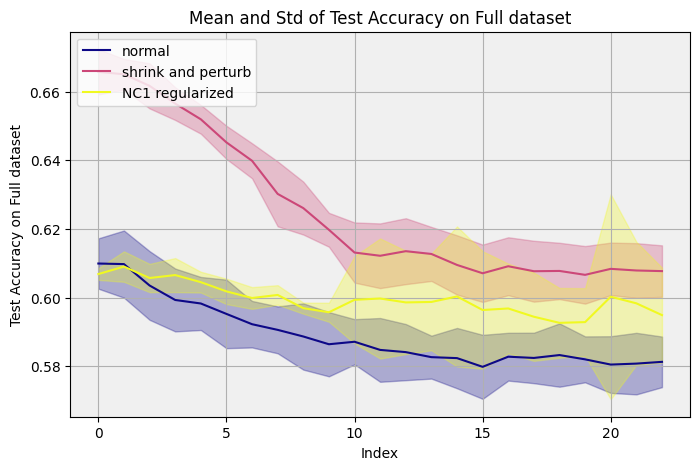

In [24]:
metric_names = ['test_acc', 'test_acc_SP', 'test_acc_reg']
y_label = 'Test Accuracy on Full dataset'
metric_labels = ['normal', 'shrink and perturb', 'NC1 regularized']
plot_metrics_with_error_bars( metric_names, y_label, metric_labels)

C:\Users\gugli\AppData\Local\Temp\ipykernel_20332\2604591964.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', len(metric_names))


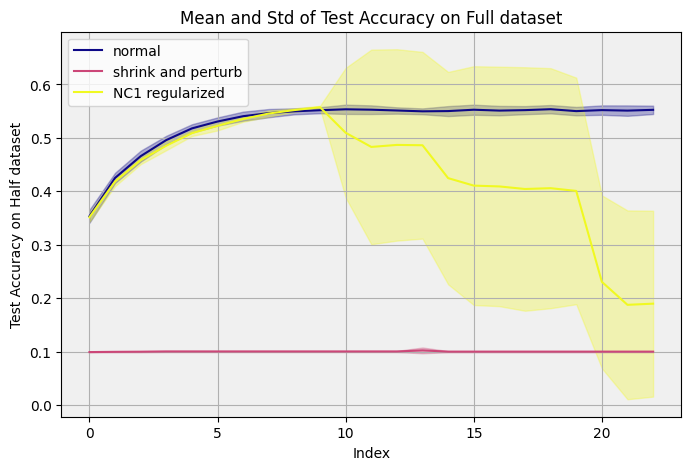

In [27]:
metric_names = ['test_acc_half', 'test_acc_half_SP', 'test_acc_half_reg']
y_label = 'Test Accuracy on Half dataset'
metric_labels = ['normal', 'shrink and perturb', 'NC1 regularized']
plot_metrics_with_error_bars( metric_names, y_label, metric_labels)

## L2 Losses

C:\Users\gugli\AppData\Local\Temp\ipykernel_20332\2890725964.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', 6)
C:\Users\gugli\AppData\Local\Temp\ipykernel_20332\2890725964.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', len(metric_names))


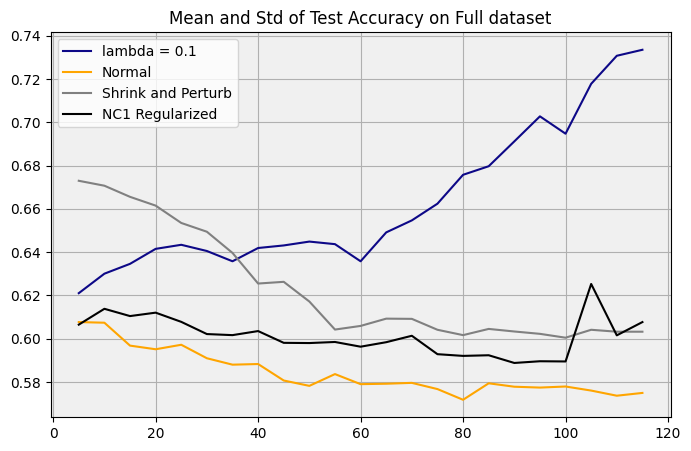

In [53]:
lambdas = [0.1]
colors = plt.cm.get_cmap('plasma', 6)
fig, ax = plt.subplots(figsize=(8, 5))
seed =7
metric_name = 'test_acc'
final_df = pd.read_csv('results/seed7/final_df.csv', index_col=0)
for i,lambda_ in enumerate(lambdas):
    results_path = f'results_reg_weight_decay/seed{seed}_{lambda_}/results.pkl'
    results_reg = pickle.load(open(results_path, 'rb'))[:23]
    index = range(5, (len(results_reg)+1)* 5, 5)
    results_reg = pd.DataFrame(results_reg, index = index)
    ax.plot(results_reg[metric_name], label=f'lambda = {lambda_}', color = colors(i))
colors = plt.cm.get_cmap('plasma', len(metric_names))

ax.plot(final_df[metric_name], label='Normal', color= 'orange')
ax.plot(final_df['test_acc_SP'], label='Shrink and Perturb', color= 'grey')
ax.plot(final_df['test_acc_reg'], label='NC1 Regularized', color= 'black')

ax.set_facecolor('#f0f0f0')
plt.title('Mean and Std of Test Accuracy on Full dataset')
ax.grid()
ax.legend(loc='upper left')
plt.show()

C:\Users\gugli\AppData\Local\Temp\ipykernel_20332\132567677.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', 6)
C:\Users\gugli\AppData\Local\Temp\ipykernel_20332\132567677.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', len(metric_names))


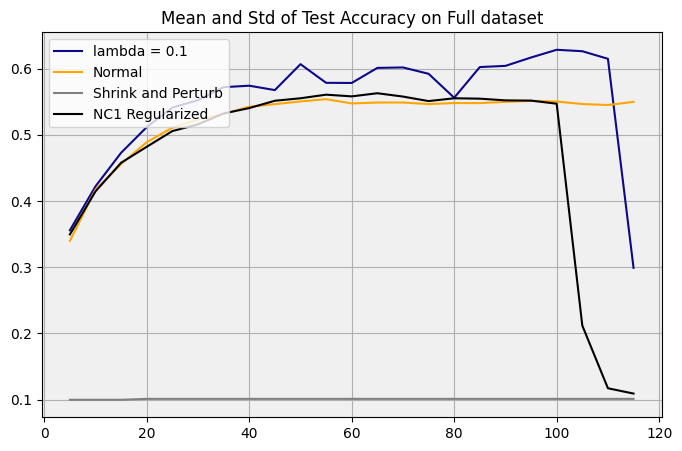

In [54]:
lambdas = [0.1]
colors = plt.cm.get_cmap('plasma', 6)
fig, ax = plt.subplots(figsize=(8, 5))
seed =7
metric_name = 'test_acc_half'
final_df = pd.read_csv('results/seed7/final_df.csv', index_col=0)
for i,lambda_ in enumerate(lambdas):
    results_path = f'results_reg_weight_decay/seed{seed}_{lambda_}/results.pkl'
    results_reg = pickle.load(open(results_path, 'rb'))[:23]
    index = range(5, (len(results_reg)+1)* 5, 5)
    results_reg = pd.DataFrame(results_reg, index = index)
    ax.plot(results_reg[metric_name], label=f'lambda = {lambda_}', color = colors(i))
colors = plt.cm.get_cmap('plasma', len(metric_names))

ax.plot(final_df[metric_name], label='Normal', color= 'orange')
ax.plot(final_df['test_acc_half_SP'], label='Shrink and Perturb', color= 'grey')
ax.plot(final_df['test_acc_half_reg'], label='NC1 Regularized', color= 'black')

ax.set_facecolor('#f0f0f0')
plt.title('Mean and Std of Test Accuracy on Full dataset')
ax.grid()
ax.legend(loc='upper left')
plt.show()